In [1]:
import graphlab

A newer version of GraphLab Create (v1.8) is available! Your current version is v1.7.1.

You can use pip to upgrade the graphlab-create package. For more information see https://dato.com/products/create/upgrade.


# Over view of functions

## Loading data

In [2]:
sales = graphlab.SFrame('../kc_house_data.gl/')

[INFO] 1453360248 : INFO:     (initialize_globals_from_environment:282): Setting configuration variable GRAPHLAB_FILEIO_ALTERNATIVE_SSL_CERT_FILE to /home/haricharan/anaconda2/lib/python2.7/site-packages/certifi/cacert.pem
1453360248 : INFO:     (initialize_globals_from_environment:282): Setting configuration variable GRAPHLAB_FILEIO_ALTERNATIVE_SSL_CERT_DIR to 
This non-commercial license of GraphLab Create is assigned to haricharan.a@gmail.com and will expire on January 08, 2017. For commercial licensing options, visit https://dato.com/buy/.

[INFO] Start server at: ipc:///tmp/graphlab_server-3924 - Server binary: /home/haricharan/anaconda2/lib/python2.7/site-packages/graphlab/unity_server - Server log: /tmp/graphlab_server_1453360248.log
[INFO] GraphLab Server Version: 1.7.1


In [3]:
sales_crime_rate = graphlab.SFrame.read_csv('../Philadelphia_Crime_Rate_noNA.csv/')

PROGRESS: Finished parsing file /media/haricharan/70a65af4-e8fd-449e-96ab-49deaf0b9680/Regression/Philadelphia_Crime_Rate_noNA.csv
PROGRESS: Parsing completed. Parsed 99 lines in 0.016061 secs.
------------------------------------------------------
Inferred types from first line of file as 
column_type_hints=[int,float,float,float,float,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------
PROGRESS: Finished parsing file /media/haricharan/70a65af4-e8fd-449e-96ab-49deaf0b9680/Regression/Philadelphia_Crime_Rate_noNA.csv
PROGRESS: Parsing completed. Parsed 99 lines in 0.016474 secs.


## Spliting data

In [4]:
train_data,test_data = sales.random_split(.8,seed=0)

## Sorting 

As in Week 3, we will use the sqft_living variable. For plotting purposes (connecting the dots), you'll need to sort by the values of sqft_living. For houses with identical square footage, we break the tie by their prices.

In [5]:
sales = sales.sort(['sqft_living','price'])

# Creating linear regression model

In [6]:
train_data.column_names

<bound method SFrame.column_names of Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+-----------+----------+-----------+
|     id     |            date           |   price   | bedrooms | bathrooms |
+------------+---------------------------+-----------+----------+-----------+
| 7129300520 | 2014-10-13 00:00:00+00:00 |  221900.0 |   3.0    |    1.0    |
| 6414100192 | 2014-12-09 00:00:00+00:00 |  538000.0 |   3.0    |    2.25   |
| 5631500400 | 2015-02-25 00:00:00+00:00 |  180000.0 |   2.0    |    1.0    |
| 2487200875 | 2014-12-09 00:00:00+00:00 |  604000.0 |   4.0    |    3.0    |
| 1954400510 | 2015-02-18 00:00:00+00:00 |  510000.0 |   3.0    |    2.0    |


In [7]:
all_features=train_data.column_names()
print all_features

['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [8]:
del all_features[0:3]

In [9]:
del all_features[all_features.index('zipcode')]

In [10]:
all_features

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [11]:
model_all = graphlab.linear_regression.create(sales, target='price', features=all_features,
                                              validation_set=None, 
                                              l2_penalty=0., l1_penalty=0,verbose='none')

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 21613
PROGRESS: Number of features          : 17
PROGRESS: Number of unpacked features : 17
PROGRESS: Number of coefficients    : 22
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | 1         | 2        | 1.035054     | 4207291.948582     | 202024.213864 |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: SUCCESS: Optimal solution found.
PROGRESS:


# Get the coefficients

In [12]:
sales['floors']

dtype: str
Rows: 21613
['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1.5', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1.5', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', ... ]

In [13]:
model_all.get('coefficients').print_rows(num_rows=22)

+---------------+-------+-----------------+
|      name     | index |      value      |
+---------------+-------+-----------------+
|  (intercept)  |  None |  -35434445.9947 |
|    bedrooms   |  None |  -33717.1488356 |
|   bathrooms   |  None |  44184.3743462  |
|  sqft_living  |  None |  2336.80854826  |
|    sqft_lot   |  None |  0.123389416711 |
|     floors    |  1.5  |  -9887.75350677 |
|     floors    |   2   |  -19806.4501786 |
|     floors    |   3   |  32824.0595451  |
|     floors    |  2.5  |  119524.939179  |
|     floors    |  3.5  |  192848.448463  |
|   waterfront  |  None |  590027.975527  |
|      view     |  None |  48738.5357221  |
|   condition   |  None |  30010.4490091  |
|     grade     |  None |  96284.0541117  |
|   sqft_above  |  None |  -2154.67771942 |
| sqft_basement |  None |  -2194.44078624 |
|    yr_built   |  None |  -2442.53736043 |
|  yr_renovated |  None |  22.1097013511  |
|      lat      |  None |  555405.759977  |
|      long     |  None |  -1073

# Converting data type

In [14]:
sales['floors']=sales['floors'].astype(float)

In [15]:
sales['floors']

dtype: float
Rows: 21613
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ... ]

# Now run the model again

In [16]:
model_all = graphlab.linear_regression.create(sales, target='price', features=all_features,
                                              validation_set=None, 
                                              l2_penalty=0., l1_penalty=0,verbose='none')

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 21613
PROGRESS: Number of features          : 17
PROGRESS: Number of unpacked features : 17
PROGRESS: Number of coefficients    : 18
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | 1         | 2        | 0.023673     | 4346348.867749     | 202610.890006 |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: SUCCESS: Optimal solution found.
PROGRESS:


In [17]:
model_all.get('coefficients')

name,index,value
(intercept),None,-36862413.7196
bedrooms,None,-34151.5741476
bathrooms,None,42161.2152885
sqft_living,None,3598.60542305
sqft_lot,None,0.127409094629
floors,None,761.471427778
waterfront,None,587855.620748
view,None,49428.9071837
condition,None,31032.1243905
grade,None,97219.9428213


# Predict using the model

In [20]:
test_data['floors']=test_data['floors'].astype(float)
model_all.predict(test_data)

dtype: float
Rows: 4229
[549953.2515587844, 950520.4641448669, 268102.3276463449, 535988.1934265383, 555888.7314760871, 579201.9928820543, 792180.4056479186, 278745.97081431746, 273242.64920418337, 814425.1483649723, 308678.47223961353, 224895.0613825582, 258439.32620371133, 326775.8868150376, 526558.4325244166, 791291.5262506455, 848400.6028245464, 370774.71463231, 661697.8544699699, 474389.6937363744, 791436.1130357534, 215713.38845448568, 336036.954330083, 357500.8530661389, 703612.929739736, 346262.8631187454, 1077437.6466882974, 339947.51699957997, 240336.45696504042, 394246.5177888088, 99227.68520990387, 709540.8179998435, 644310.9949100837, 199882.9340411909, 331907.61536407843, 459557.4994026236, 224164.68030893058, 1122045.0028682575, 1633149.9923349433, 302536.1417193152, 741414.859529715, 933336.5157917291, 259173.37734829634, 414391.9377392046, 203647.01822461188, 1293677.6873019822, 915971.5627848469, 753399.4692137241, 494178.13262185827, 869998.2086935714, 360160.6257228

# Evaluate the model 

In [22]:
model_all.evaluate(test_data)

{'max_error': 4103069.890599653, 'rmse': 199520.57614838568}

# Compute Residual sum of squares

In [23]:
sum((model_all.predict(test_data)-test_data['price'])**2)

168349978636542.44

In [24]:
print sum((model_all.predict(test_data)-test_data['price'])**2)

1.68349978637e+14


# Relation between RSS and rmse

In [30]:
from math import sqrt

In [29]:
sqrt(sum((model_all.predict(test_data)-test_data['price'])**2)/len(test_data))

199520.5761483855

# String concatination

In [31]:
model_1_features = ['sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long']
model_2_features = model_1_features + ['bed_bath_rooms']
model_3_features = model_2_features + ['bedrooms_squared', 'log_sqft_living', 'lat_plus_long']

# Plotting 

In [43]:
import numpy as np

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
np.random.rand(2)

array([ 0.24657857,  0.3809217 ])

[ 0.51432836  0.92616854  0.27211339  0.911528  ] [ 0.15067855  0.06518492  0.03847134  0.20278256]


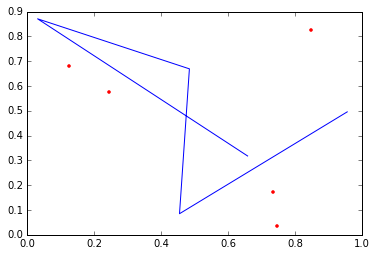

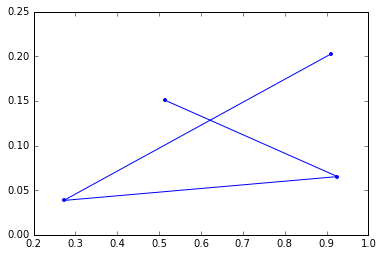

In [63]:
plt.plot(np.random.rand(5),np.random.rand(5))
plt.plot(np.random.rand(5),np.random.rand(5),'r.')
plt.figure()
x=np.random.rand(4);
y=np.random.rand(4);
print x,y
plt.plot(x,y,'b.')
plt.plot(x,y,'b.-')

# For loop

In [33]:
n = 1000
k = 10 

for i in xrange(k): # Dont forget the colon and the indentation
    start = (n*i)/k
    end = (n*(i+1))/k-1
    print i, (start, end)

0 (0, 99)
1 (100, 199)
2 (200, 299)
3 (300, 399)
4 (400, 499)
5 (500, 599)
6 (600, 699)
7 (700, 799)
8 (800, 899)
9 (900, 999)


# Generating values

In [35]:
import numpy as np

In [40]:
print np.logspace(1,7,num=13)
print np.linspace(1,7,7)
print np.linspace(1,7,15)

[  1.00000000e+01   3.16227766e+01   1.00000000e+02   3.16227766e+02
   1.00000000e+03   3.16227766e+03   1.00000000e+04   3.16227766e+04
   1.00000000e+05   3.16227766e+05   1.00000000e+06   3.16227766e+06
   1.00000000e+07]
[ 1.  2.  3.  4.  5.  6.  7.]
[ 1.          1.42857143  1.85714286  2.28571429  2.71428571  3.14285714
  3.57142857  4.          4.42857143  4.85714286  5.28571429  5.71428571
  6.14285714  6.57142857  7.        ]
